<a href="https://colab.research.google.com/github/retroman75/NYC_Taxi_Colab/blob/main/Presentable_Notebook_NYC_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOC
0. Import libraries
back to top
1. Import data
back to top
2. Explore data
back to top
3. Clean Data
back to top
4. Prepare Data 
back to top
5. Benchmark model
back to top
* Train-test split
back to top
* Fit a model to the data
back to top
* Model evaluation
back to top
* Fix problems 
back to top
6. Feature engineering
back to top
7. Model training
back to top
* Decision Tree
back to top
* Random Forest - Overfit-Underfit
back to top
* Gradient boosting
back to top
* Comparing algorithm performances
back to top
8. Tuning
back to top
* Find best parameters
back to top

Bonus: Classification
back to top

# 0. Import libraries
back to top

In [117]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving nyc_weather.csv to nyc_weather.csv
Saving taxi_zone_lookup.csv to taxi_zone_lookup.csv
User uploaded file "nyc_weather.csv" with length 114520 bytes
User uploaded file "taxi_zone_lookup.csv" with length 12322 bytes


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving yellow_tripdata_2019-01.csv to yellow_tripdata_2019-01.csv
User uploaded file "yellow_tripdata_2019-01.csv" with length 687088084 bytes


# 1. Import data
back to top

In [118]:
taxi_jan_2019 = pd.read_csv('yellow_tripdata_2019-01.csv')
taxi_data = pd.concat([taxi_jan_2019])

In [119]:
print(taxi_data.shape)
taxi_data.head()

(7667792, 18)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


# 2. Explore data
back to top

In [120]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [122]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [123]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3dac250b8>,
      dtype=object)

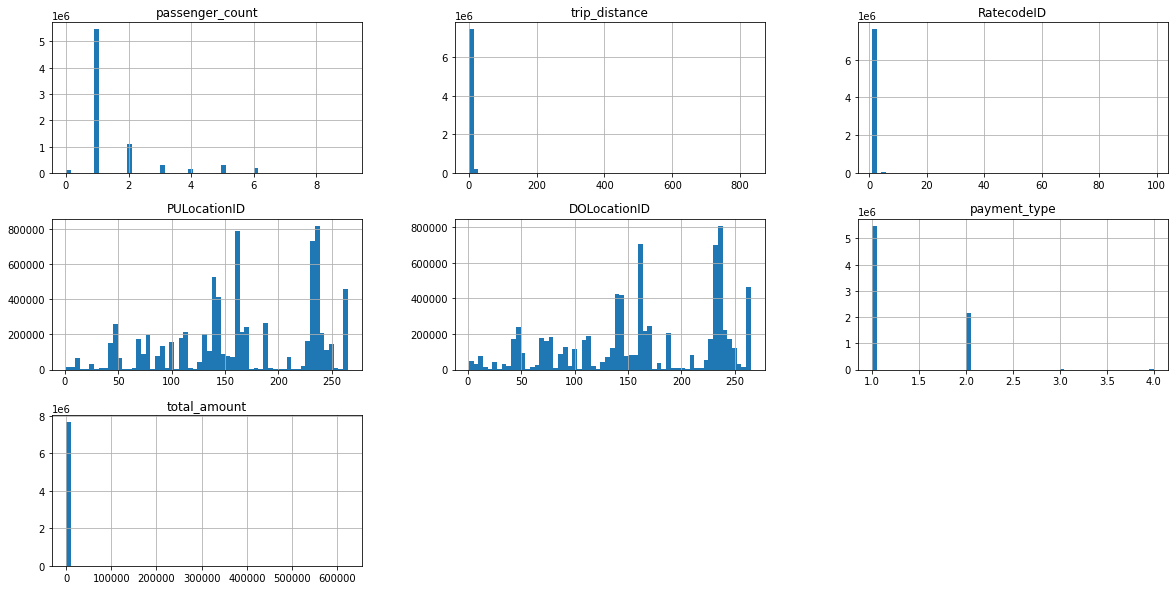

In [124]:
taxi_data.hist(figsize=(20,10), bins=60)

In [70]:
taxi_data['RatecodeID'].value_counts()

1     7430139
2      166090
5       54569
3       11801
4        4895
99        252
6          46
Name: RatecodeID, dtype: int64

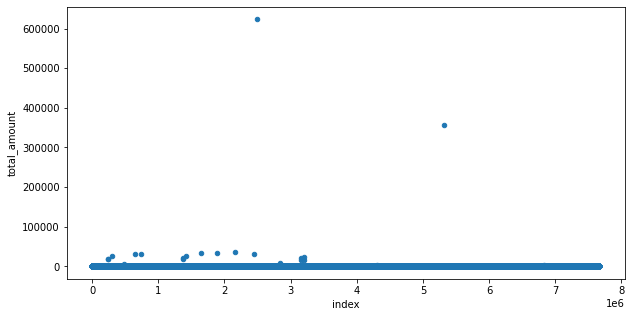

In [71]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))


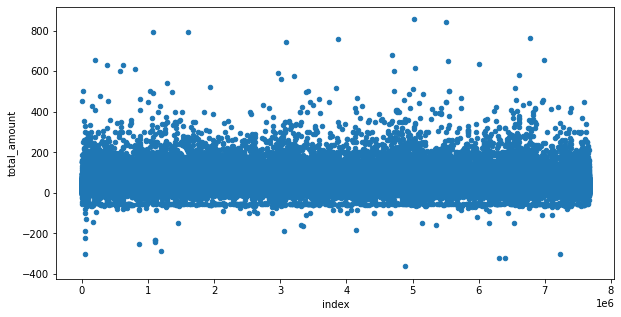

In [72]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

We have 2 separate things to deal with here: Negative Values, and Very High values.  Let's look at negative values first.

(7131, 9)


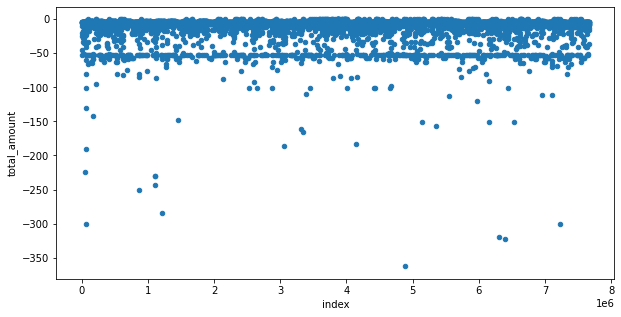

In [73]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y = 'total_amount', x='index', figsize=(10,5))

In [74]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,234,234,4,-4.3


In [75]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4088
4    2666
2     376
1       1
Name: payment_type, dtype: int64

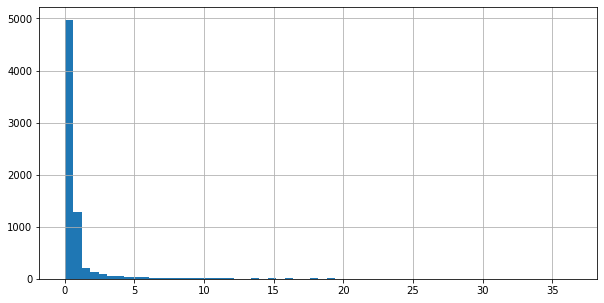

In [76]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [77]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1414, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1,0.0,5,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1,0.0,5,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1,0.0,1,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1,0.0,1,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1,0.0,1,264,7,2,0.0


In [78]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    815
2    569
3     29
4      1
Name: payment_type, dtype: int64

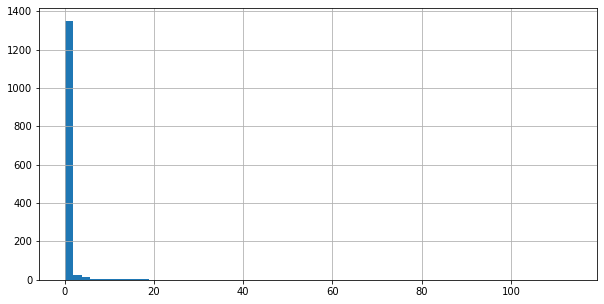

In [79]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [80]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00    1270
1.00       4
0.01       4
0.02       4
0.03       3
        ... 
0.59       1
0.18       1
5.70       1
0.87       1
1.04       1
Name: trip_distance, Length: 110, dtype: int64

So we just got rid of the negative values safely. But what about the Very High Values?

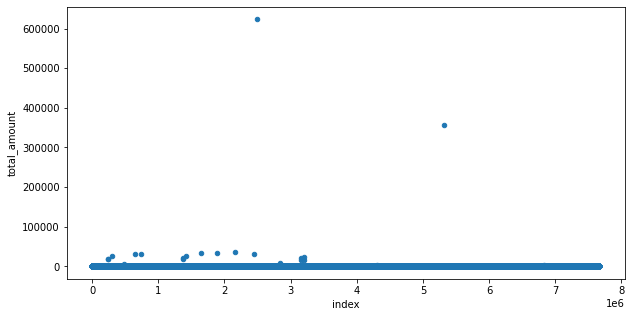

In [81]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [82]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [83]:
taxi_data['total_amount'].mean()

15.68222215901336

We can cut off all Very High Amounts over $200.

#3. Clean Data
back to top

In [84]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [85]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7667792, 9)


(7659490, 9)

Let's check for Missing values.

In [86]:
taxi_data_filtered.isna().sum

<bound method DataFrame.sum of          tpep_pickup_datetime  ...  total_amount
0                       False  ...         False
1                       False  ...         False
2                       False  ...         False
3                       False  ...         False
4                       False  ...         False
...                       ...  ...           ...
7667787                 False  ...         False
7667788                 False  ...         False
7667789                 False  ...         False
7667790                 False  ...         False
7667791                 False  ...         False

[7659490 rows x 9 columns]>

# 4. Prepare Data 
back to top

In [87]:
taxi_data_prepared = taxi_data_filtered.copy()

Just making sure everything is the right type. 

In [88]:
taxi_data_prepared.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
total_amount             float64
dtype: object

In [89]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [90]:
taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [91]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [92]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55


In [93]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# -> we make it datetime again because it's very little use when it's just a string (can't compare, sort, etc.)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] =  taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [94]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa372d8b748>,
      dtype=object)

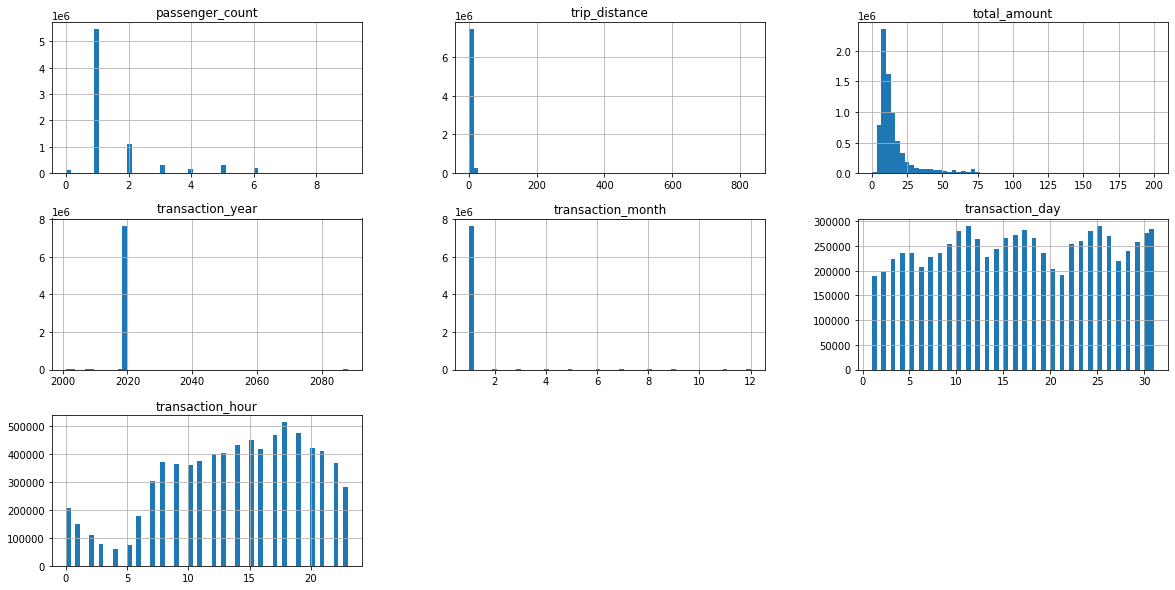

In [95]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [96]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]


Let's take stock of our categorical and numerical columns at this point.

In [97]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns


In [98]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7658954, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


Aggregate the data points

Here's a good place to think about what we want to begin to predict. We will need to transform our data into certain formats according to what we choose to predict.

In [99]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102556, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


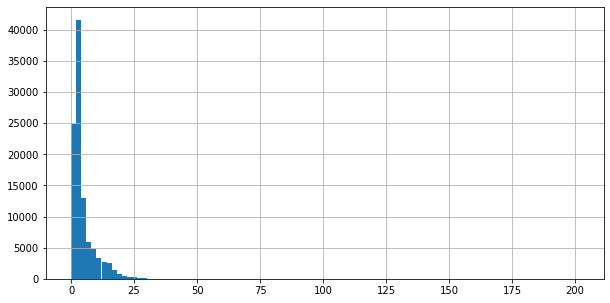

In [100]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

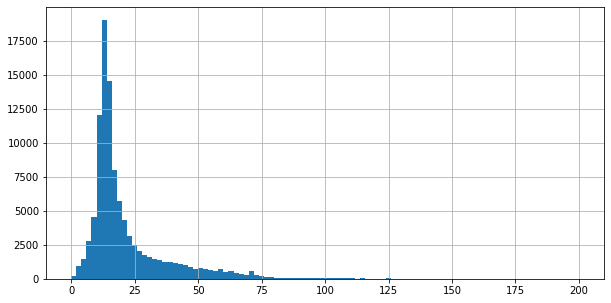

In [101]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

# 5. Benchmark model
back to top

In [102]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [103]:
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.00,21.800,1
1,1,2019-01-01,1,1,5,0.00,87.300,1
2,1,2019-01-01,1,1,6,0.00,80.300,1
3,1,2019-01-01,1,1,8,0.00,128.580,2
4,1,2019-01-01,1,1,10,16.90,43.245,4
...,...,...,...,...,...,...,...,...
102551,98,2019-01-31,1,31,18,16.66,58.060,1
102552,99,2019-01-18,1,18,18,1.66,9.800,1
102553,99,2019-01-26,1,26,8,0.42,6.000,1
102554,99,2019-01-30,1,30,7,2.87,18.050,1


In [104]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'


# 5.1 Train-test split
back to top

In [125]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)


# 5.2 Fit a model to the data
back to top

In [126]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# 5.3 Model evaluation
back to top

In [127]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.7769951317198
mean_squared_error 217.190782701131
root_mean_squared_error 14.737394026799006
r2 0.22494184560924446


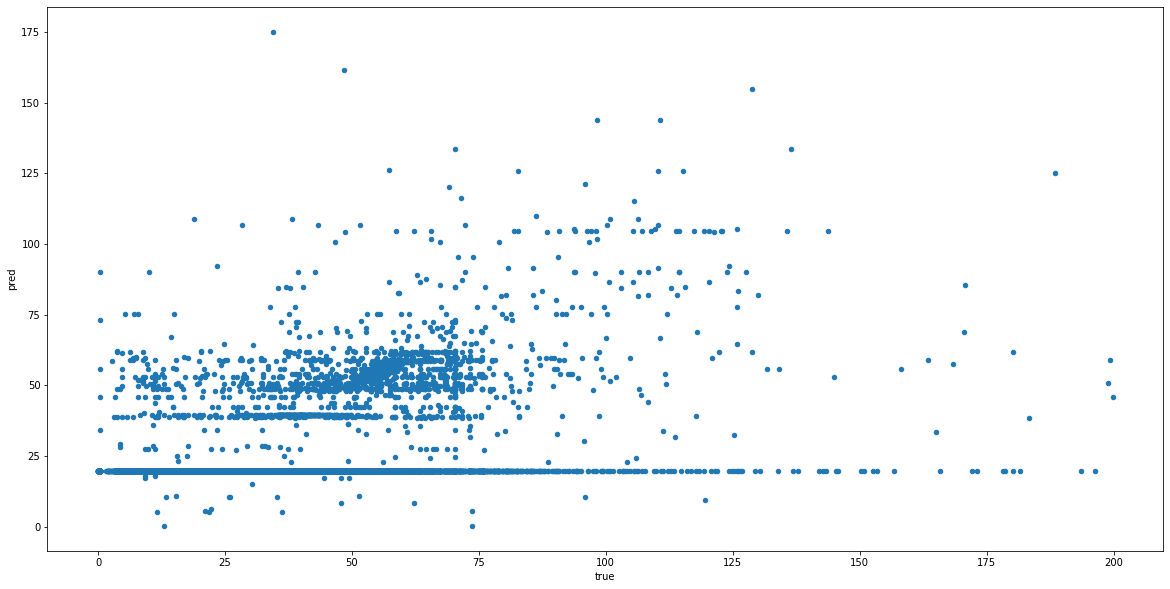

In [128]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

This looks a bit too good to be true!

# 5.4 Fix problems 
back to top

In [129]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.776803074043281
mean_squared_error 217.1862693457356
root_mean_squared_error 14.737240900037415
r2 0.22495795178492728


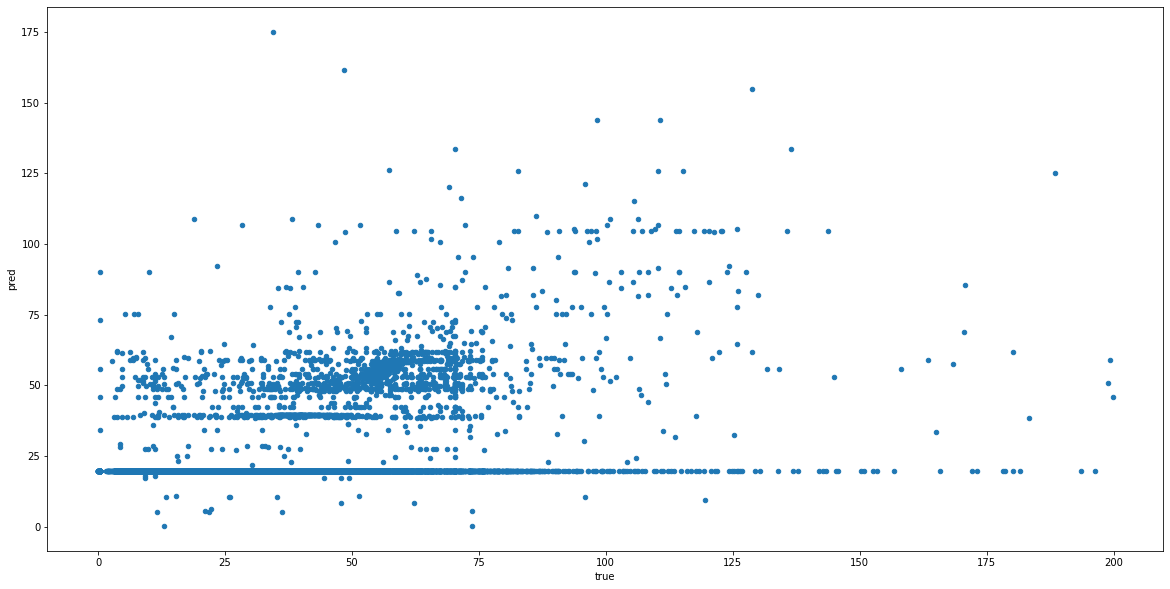

In [130]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')


# 6. Feature engineering
back to top


In [111]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [112]:
data_with_new_features = taxi_grouped_by_region.copy()

## Date-related features

In [113]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)


In [114]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [131]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


## Borough Information

In [116]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

MessageError: ignored

In [132]:
zone_lookup = pd.read_csv('taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [133]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [134]:
data_with_new_features['Borough'].value_counts()

Manhattan        45309
Brooklyn         23633
Queens           22002
Bronx             9586
Unknown           1453
Staten Island      302
EWR                271
Name: Borough, dtype: int64

## Weather Related Features

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [135]:
nyc_weather = pd.read_csv('nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [136]:
nyc_weather.shape

(2936, 6)

### We have some missing values and percentage values that we cannot work with unless we adjust them. Let's take a closer look:

In [137]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [138]:
nyc_weather['cloud cover'].value_counts()

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [139]:
nyc_weather['amount of precipitation'].value_counts()

Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
12.0                        7
13.0                        7
15.0                        6
11.0                        5
16.0                        3
14.0                        2
22.0                        2
29.0                        2
18.0                        1
34.0                        1
68.0                        1
24.0                        1
30.0                        1
21.0                        1
20.0                        1
35.0                        1
63.0                        1
17.0                        1
25.0                        1
Name: amou

PASTE MY QUESTIONS TO MISRA HERE ABOUT THE AMOUNTS AND SNOW/RAIN

In [140]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

### Trace of precipitation can be thought of as 0.1
And the missing values 0

In [141]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)


In [142]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)


In [143]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [144]:
nyc_weather.loc[:,'date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day


In [145]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [146]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [147]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()


(102556, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [148]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time', 'hour', 'month', 'day'], axis=1)

In [149]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [150]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                        0
temperature                68371
humidity                   68371
wind speed                 68371
cloud cover                68371
amount of precipitation    68371
dtype: int64

In [151]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [152]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()


PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [153]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


# 7. Model training
back to top

In [154]:
data_for_model = nyc_taxi_with_weather.copy()

In [155]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'


### Train-Test Split

In [156]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# 7.1 Decision Tree
back to top


In [157]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [158]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


mean_absolute_error 8.542813102542185
mean_squared_error 196.86213654193926
root_mean_squared_error 14.030756805744273
r2 0.30604865492586286


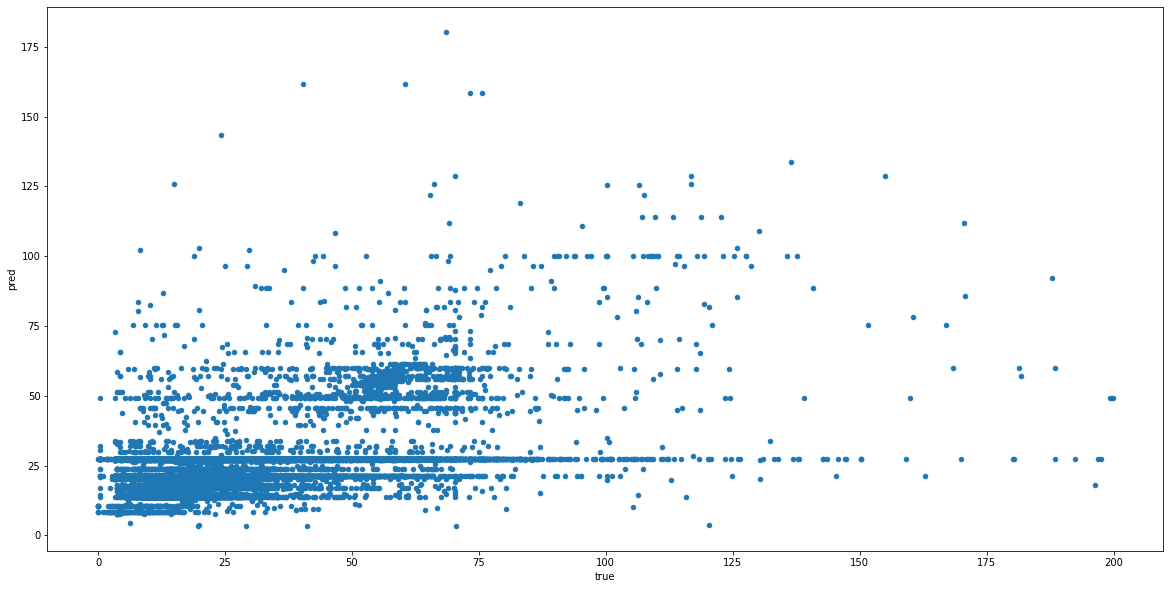

In [159]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')


### Overfit
The model fits the training data's  pattern so much - that it loses the ability to generalize.

In [160]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test


In [161]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)


2
5
8
10
15
20
30
50
70
100
150


In [162]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,14.951628,15.174393
1,5,14.122533,14.497210
2,8,13.523693,14.135929
3,10,13.139617,14.031131
4,15,12.048870,14.295927
5,20,11.099972,14.537443
6,30,9.498728,15.017683
7,50,5.425101,16.613294
8,70,1.124530,17.382194
9,100,0.000005,17.480376


Text(0, 0.5, 'root mean squared error')

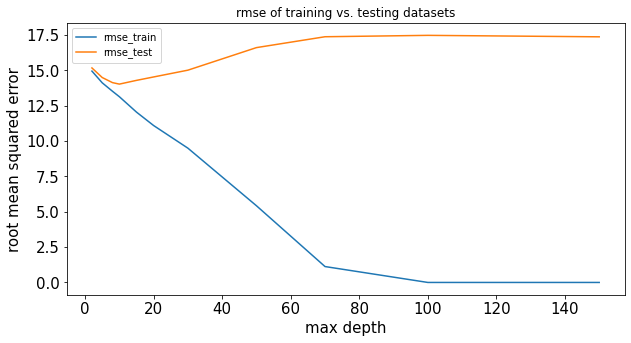

In [163]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)


### Underfit
Underfit is when the model CANNOT capture the data's pattern AT ALL.

In [164]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test


In [165]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))


mean_absolute_error 9.947300430991639
mean_squared_error 239.0808641645717
root_mean_squared_error 15.462239946546285
r2 0.12373835366276387


In [166]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))


mean_absolute_error 10.082374129980222
mean_squared_error 249.23442786807357
root_mean_squared_error 15.787160221777492
r2 0.12143305210453104


# 7.2 Random Forest
back to top

In [167]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [168]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


mean_absolute_error 7.426290364782942
mean_squared_error 175.15942539544645
root_mean_squared_error 13.234780897145463
r2 0.382552069225929


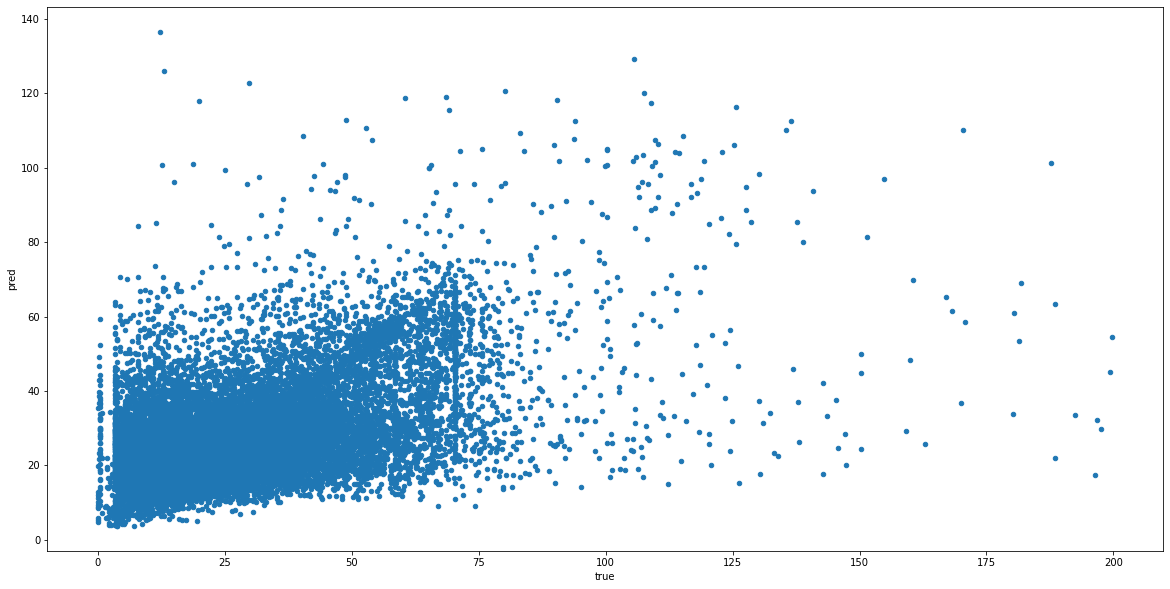

In [169]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')


# 7.3 Gradient boosting
back to top


In [170]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [171]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.388255170932192
mean_squared_error 178.9921447965296
root_mean_squared_error 13.378794594302194
r2 0.3690414935997888


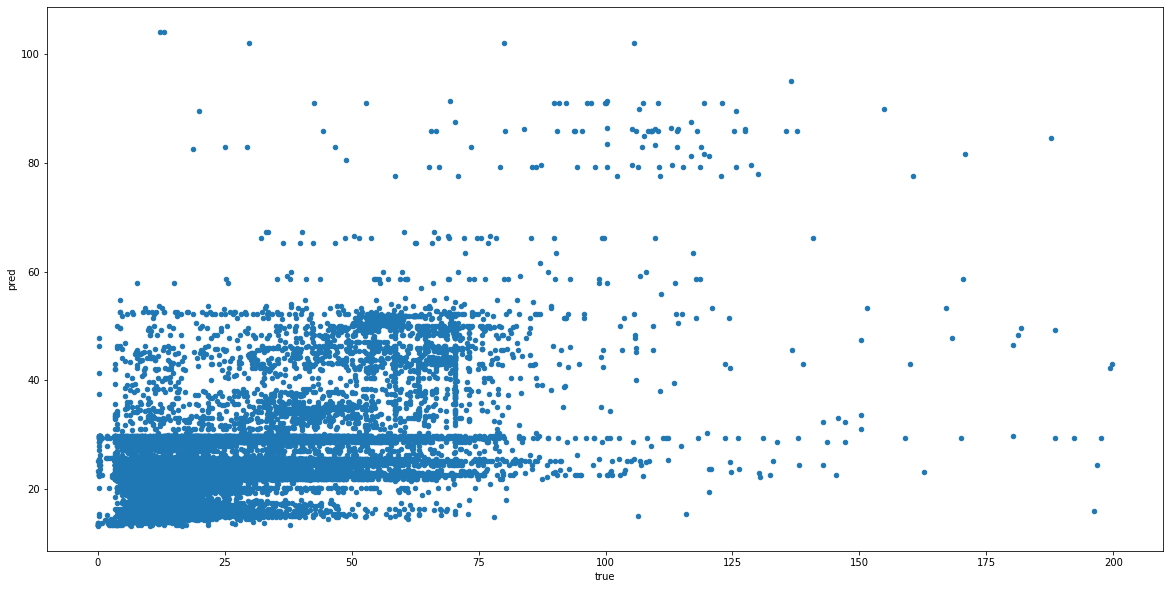

In [172]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')


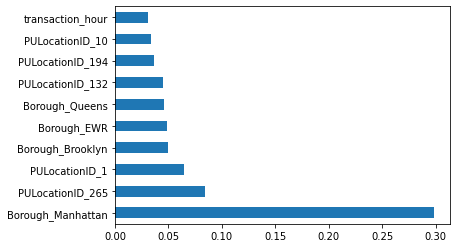

In [173]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))


# FIGURE THIS OUT 7.4 Comparing algorithm performances
back to top


| ALGORITHM | MAE | RMSE | R2 |
|---|---|---|---|
| Random Forest | 7.426 | 13.235 | 0.383
| Gradient Boosting | 8.388 | 13.379 | 0.369
| Underfit Training | 9.95 | 15.462 | 0.124
| Underfit Testing | 10.082 | 15.787 | 0.121

# 8. Tuning (Random Forest)
back to top


# 8.1 Find best parameters
back to top

In [174]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [175]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [176]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 117.6min finished


In [177]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,89.381383,0.373374,4.459286,0.072717,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.402485,0.415723,0.412013,0.410074,0.005576,2
1,28.148807,0.236514,1.515937,0.061898,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.354651,0.371857,0.362829,0.363113,0.007027,6
2,37.180126,0.403134,1.478519,0.030871,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.355474,0.372105,0.361461,0.363013,0.006878,7
3,630.298581,8.423880,2.865242,0.136221,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.351961,0.365844,0.361048,0.359618,0.005757,8
4,2269.734666,85.143296,11.759981,0.081044,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.350632,0.365687,0.375445,0.363922,0.010207,5
5,579.123438,2.320579,26.038309,0.188346,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.382589,0.393953,0.390357,0.388966,0.004742,4
6,93.565289,1.394840,3.246269,0.058045,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.269013,0.280303,0.272968,0.274095,0.004678,9
7,299.410627,2.752611,15.506756,0.355011,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.401209,0.416947,0.408286,0.408814,0.006436,3
8,3912.183910,112.870540,18.448974,3.233189,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.213532,0.213934,0.190991,0.206152,0.010722,10
9,239.963742,2.104304,10.281732,0.045948,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.411547,0.426191,0.422256,0.419998,0.006188,1


Downloading a copy of these performance data to .csv so I don't have to wait next time I use this data.

In [190]:
performances.to_csv("NYC_performance.csv")

In [178]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1800,min_samples_split= 2,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


Time elapsed:  434.0480773448944  seconds
mean_absolute_error 7.4178891175758555
mean_squared_error 161.21458297860886
root_mean_squared_error 12.697030478761908
r2 0.43170851099780694


In [179]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))


Time elapsed:  49.90506076812744  seconds
mean_absolute_error 7.34833845245786
mean_squared_error 160.7587230835225
root_mean_squared_error 12.679066333272434
r2 0.4333154456421088


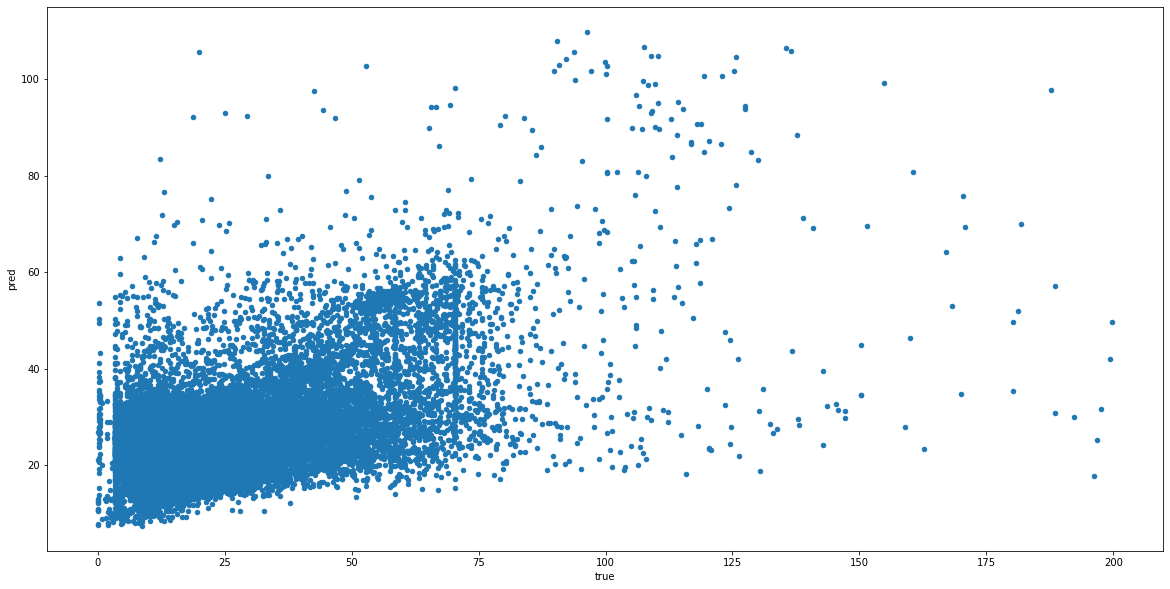

In [180]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')


# Bonus: Classification
back to top


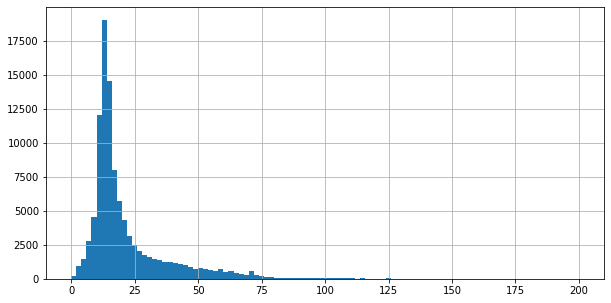

In [181]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))


In [182]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0,low,0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,high,1
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0


In [183]:
nyc_class['earning_class'].value_counts()

high    53099
low     49457
Name: earning_class, dtype: int64

In [184]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'earning_class_binary'


In [185]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)


In [186]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)


In [187]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[11413  4967]
 [ 3685 13779]]
accuracy 0.7443564590473939
precision 0.7350368078523418
recall 0.7889945029775538


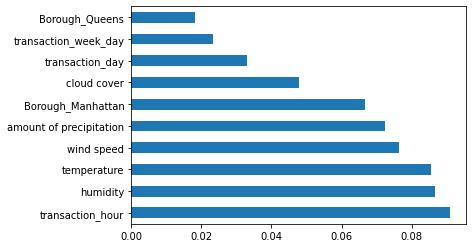

In [188]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh'))
